# Social Graphs Final Project

For this project, our goal is to take the top 150 most popular movies of all times on IMDB, and analyse the connection between the main actors starring in them. We want to get an insight into the dynamics of relationships and collaborations among actors in the film industry. For example, we might discover key actors who have repeatedly worked together, which would indicate successful collaborations.

## Creating the network

WE NEED THE CODE FOR MOVIES CAST NEW FILE HERE

ALSO NEED TO EXPLAIN THIS FOLLOWING CODE A BIT MORE WITH COMMENTS

In [1]:
import networkx as nx
import pickle
import re 
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

In [2]:

def remove_number_dot_space(s):
    re.sub(r'^\d+\.\s*', '', s)

# to get the first x amount of items from the dictionary
def get_first_N_item(d, n):
    items = list(d.items())[:n]
    return dict(items)

# open the dictionary with the cast for each movie
with open("movies_cast_new.pkl", "rb") as fp:
    data = pickle.load(fp)
    
# only take the top 150 movies cast
new_data = get_first_N_item(data, 150)

# save the 150 movie titles
movie_titles = list(new_data.keys())

# create an empty graph
G = nx.Graph()
temp_names = new_data.values()
all_names = []

# we take the top cast from each movie, the first 10 actors
top_cast_nr = 10

for i in temp_names:
    if len(i) > top_cast_nr:
        i = i[:top_cast_nr]
    all_names += i

# remove repeated actors
unique_items = set(all_names)

# add unique actors as nodes to the graph
unique_list = list(unique_items)
G.add_nodes_from(unique_list)

data = new_data

actor_dict = {}
keys = data.keys()

for actor in list(G.nodes()):
    movies_list = [movie for movie, actors_list in data.items() if actor in actors_list]
    actor_dict[actor] = movies_list


print(actor_dict)


nx.set_node_attributes(G, actor_dict, 'movies starred in')

print(actor_dict)
for names in new_data.values():
    if len(names) > top_cast_nr:
        names = names[:top_cast_nr]
    
    for i in range(len(names)):
        for j in range(len(names)):
            if names[i] != names[j]:
                G.add_edge(names[i], names[j])
                
            


{'Nobuo Kaneko': ['Ikiru'], 'Freddie Jones': ['The Elephant Man'], 'Kazuhiko Inoue': ['Your Name.'], 'Anthony Hopkins': ['The Silence of the Lambs', 'The Father', 'The Elephant Man'], 'Alonzo Brown': ["One Flew Over the Cuckoo's Nest"], 'Sala Baker': ['The Lord of the Rings: The Return of the King', 'The Lord of the Rings: The Fellowship of the Ring', 'The Lord of the Rings: The Two Towers'], 'Daniel Davis': ['The Prestige'], 'Cyril Mendy': ['The Intouchables'], 'Kirk Douglas': ['Paths of Glory'], 'Anthony Dawson': ['Dial M for Murder'], 'Jason Gray-Stanford': ['A Beautiful Mind'], 'Henry Travers': ["It's a Wonderful Life"], 'Gino Ardito': ['Taxi Driver'], 'James Coburn': ['The Great Escape'], 'Zendaya': ['Spider-Man: No Way Home'], 'Lubna Azabal': ['Incendies'], 'Robert Loggia': ['Scarface'], 'Leo G. Carroll': ['North by Northwest'], 'Randy Brooks': ['Reservoir Dogs'], 'Emerson Gomes': ['City of God'], 'Marcus Chong': ['The Matrix'], 'Harry Myers': ['City Lights'], 'Mohamad Abdellatif

## Analysis of the network

from assignment 2, some things we could answer:

### Basic stats of the network

_Exercise 1a_: Stats (see lecture 4 and 5 for more hints)

> * What is the number of nodes in the network? 
> * What is the number of links?
> * Who is the top connected actor? Comment on your findings. Is this what you would have expected?


In [3]:
print("There are {} number of nodes in the network".format(G.number_of_nodes()))
print("There are {} number of links in the network".format(G.number_of_edges()))

There are 1287 number of nodes in the network
There are 6563 number of links in the network


In [4]:
# get the degrees of each node
degrees = dict(G.degree())

# all_degrees = [degrees[i] for i in G.nodes()]

# Sort degrees in descending order
sorted_degrees = sorted(degrees.items(), key=lambda item: item[1], reverse=True)

# Get the top 5 nodes
top_nodes = dict(sorted_degrees[:10])

# Print the names of the top 5 actors
print("Top 10 Actors:")
for actor_name, degree in top_nodes.items():
    print(f"{actor_name}: {degree} degrees")

Top 10 Actors:
Robert De Niro: 51 degrees
Morgan Freeman: 42 degrees
Harrison Ford: 39 degrees
Tom Hanks: 39 degrees
Leonardo DiCaprio: 36 degrees
Gary Oldman: 30 degrees
Michael Caine: 29 degrees
Mark Ruffalo: 29 degrees
Christian Bale: 29 degrees
Alec Guinness: 28 degrees


### Degree distribution of the network

> * Plot the degree distribution for the whole network. 
>   * Use axes that make sense for visualizing this particular distribution.
>   * What do you observe? 
>   * Give a pedagogical explaination of why the in-degree distribution is different from the out-degree distribution?
> * Find the exponent (by using the `powerlaw` package) for the in- and out-degree distributions. What does it say about our network?
> * Compare the two degree distributions to the degree distribution of a *random network* (undirected) with the same number of nodes and probability of connection *p*. Comment your results. ????? is this meaningful for us?


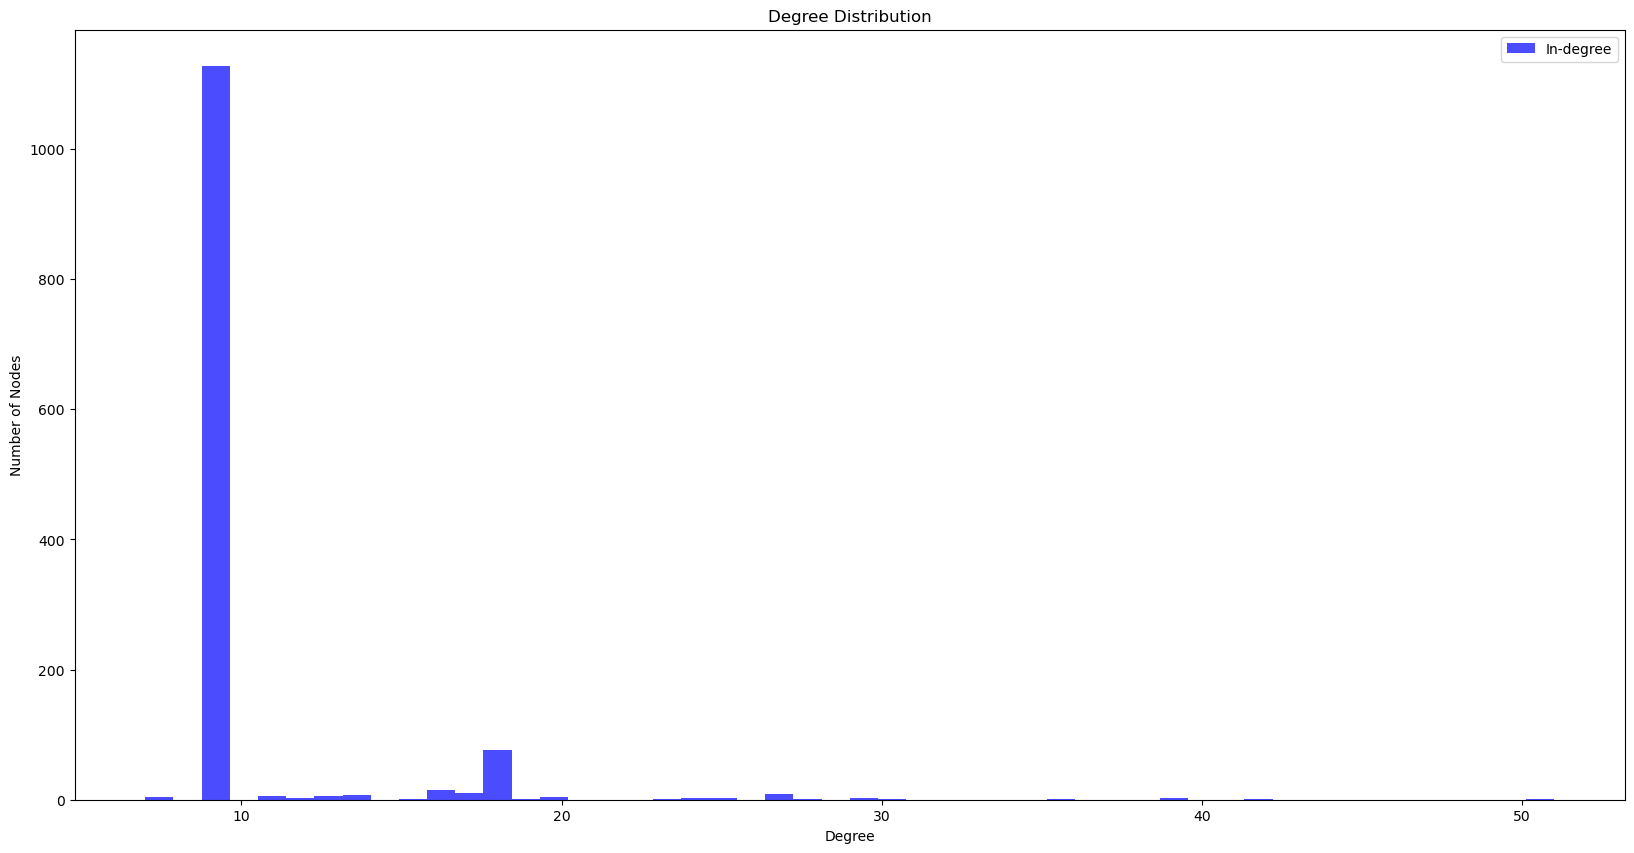

In [5]:
# make a list of the degrees
degrees_list = []
for node in G.nodes():
    degrees_list.append(degrees[node])

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot in-degree distribution
plt.hist(degrees_list, bins=50, color='blue', alpha=0.7, label='In-degree')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution')
plt.legend()
plt.show()

The network is somewhat similar to a power-law fit, but it is not perfect. There is a specific group of nodes of degree close to 18 which is significantly higher than the others. Let's take a look at the actors from this nodes, just to get an idea of who they might be.

In [6]:
# Get the degrees of each node
degrees = dict(G.degree())

# Specify the degree range
target_degree_range = (17, 19)

# Identify actors within the target degree range
actors_within_range = [actor for actor, degree in degrees.items() if target_degree_range[0] <= degree <= target_degree_range[1]]

# Print the names of actors within the target degree range
print(f"Actors within the degree range {target_degree_range}:")
for actor_name in actors_within_range:
    print(actor_name)

Actors within the degree range (17, 19):
Thomas Mitchell
Stephen Root
F. Murray Abraham
Fred MacMurray
Ellen Burstyn
Joe Turkel
G.D. Spradlin
Mark Rolston
Pete Postlethwaite
Albert Brooks
Willem Dafoe
Woody Harrelson
Tim Roth
Hugo Weaving
Humphrey Bogart
Ted Levine
Martin Sheen
Samuel L. Jackson
Carrie-Anne Moss
Scatman Crothers
Tom Wilkinson
Edward Norton
Claude Rains
Charles Bronson
Barry Pepper
Aamir Khan
Marlene Dietrich
Bruce Willis
Joan Shawlee
Michael Madsen
Joaquin Phoenix
Ray Walston
Keenan Wynn
R. Lee Ermey
Ben Kingsley
Allison Janney
Orlando Bloom
Richard Attenborough
Hugh Jackman
James Donald
Danny DeVito
Laurence Fishburne
Matthew McConaughey
Richard Harris
James Cromwell
Jack Hawkins
Henry Daniell
Thelma Ritter
Paul Reiser
Sam Rockwell
Joe Pantoliano
James Stewart
William Holden
Sean Astin
Tom Holland
Danny Aiello
Miles Teller
Alfred Molina
Liam Neeson
Martin Balsam
Matthew Modine
Billy Boyd
Marilyn Monroe
Benedict Cumberbatch
Tatsuya Nakadai
Edward Furlong
Grace Kelly
Jo

Now we will fit the distribution to a powerlaw fit, to see how much the exponent is.

In [59]:
degreesArray = np.array(degrees_list)
exponent_degrees = powerlaw.Fit(degreesArray + 1, xmin = 1, discrete=True).alpha
print("The exponent for the degree distribution is {}".format(exponent_degrees))

The exponent for the degree distribution is 1.3252197196926403


### Visualization of the network

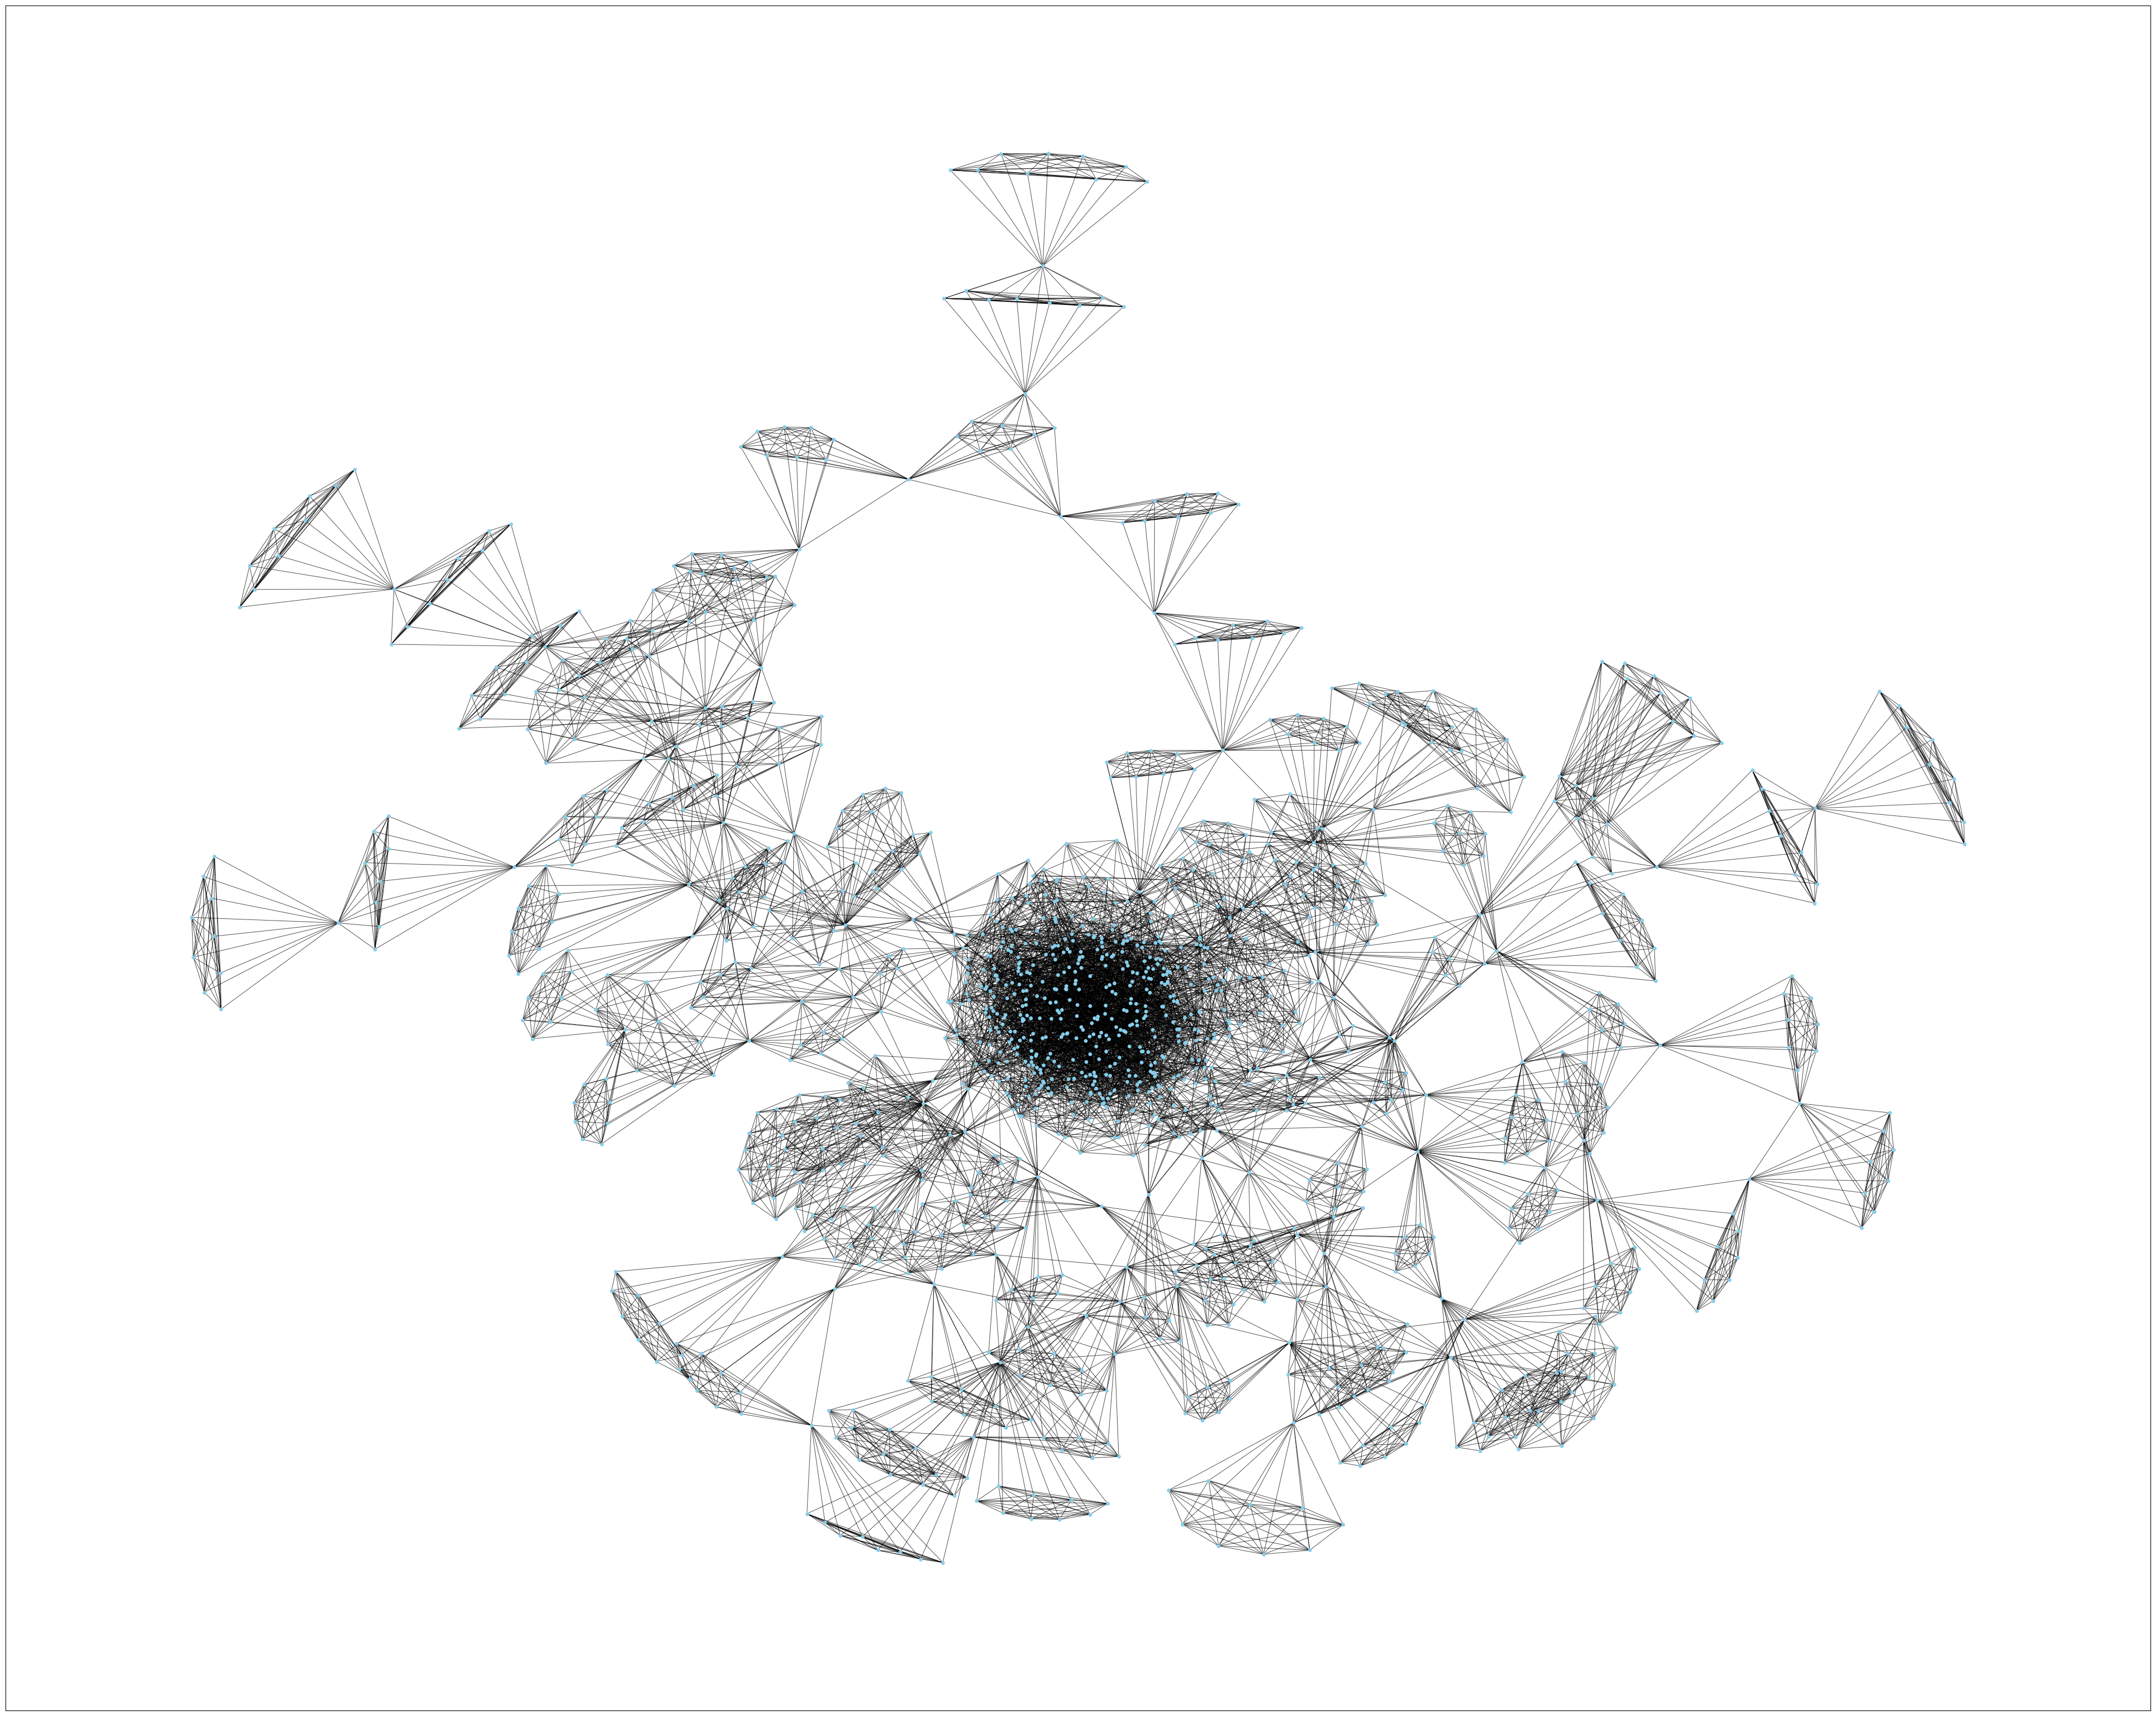

In [10]:
# Get positions for all nodes
pos = nx.kamada_kawai_layout(G)

# Get the degrees of each node and scale the node size based on it
node_size = [degree * 10 for degree in degrees.values()]

# Set the figure size
plt.figure(figsize=(50, 40))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=15, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, width=0.7, alpha=0.7)

plt.show()

We can clearly see on this plot the different groups of actors that have worked together in one movie, on the edges of the network. In the center, we observe a heavier group of actors that have shared sets in different movies.

## Communities in the network

In this section, we are going to try to find communities within the whole network of actors. To do so, we are using the Python-Louvian algorithm implementation, which is used to find partitions that potentially form communities in a network. It is an unsupervised algorithm, based on maximizing the modularity of the partitions it generates.

In [26]:
import networkx as nx
import community


# Apply the Louvain algorithm to find communities in the graph
communities = community.best_partition(G)

# Calculate modularity for the East Coast communities
modularity = community.modularity(communities, G)

In [27]:
print("Number of Communities:", len(set(communities.values())))
print("Modularity for Communities:", modularity)

Number of Communities: 54
Modularity for Communities: 0.9131504494152692


The modularity is very close to 1, which means it is significantly high. This indicates a very strong community structure within our network.  

In [28]:
# Create a mapping of actors to their respective communities
actor_community_mapping = {actor: community_label for actor, community_label in communities.items()}

# Print information about actors in each community
for community_label in set(actor_community_mapping.values()):
    actors_in_community = [actor for actor, label in actor_community_mapping.items() if label == community_label]
    print(f"\nCommunity {community_label}:")
    print(actors_in_community)


Community 0:
['Nobuo Kaneko', 'Bokuzen Hidari', 'Akira Ishihama', 'Isao Kimura', 'Tôru Takeuchi', 'Tatsuya Mihashi', 'Yoshio Kosugi', 'Yoshio Inaba', 'Miki Odagiri', 'Jun Tazaki', 'Takashi Shimura', 'Haruo Tanaka', 'Kyôko Kagawa', 'Kenjirô Ishiyama', 'Daisuke Katô', 'Yukiko Shimazaki', 'Nobuo Nakamura', 'Masao Mishima', 'Seiji Miyaguchi', 'Ichirô Nakatani', 'Noriko Honma', "Shin'ichi Himori", 'Kei Satô', 'Keiko Tsushima', 'Minoru Chiaki', 'Minosuke Yamada', 'Tetsurô Tanba', 'Kichijirô Ueda', 'Shima Iwashita', 'Hisashi Igawa', 'Makoto Kobori', 'Tatsuya Nakadai', 'Toshirô Mifune', 'Takeshi Katô', 'Kamatari Fujiwara', 'Machiko Kyô', 'Masayuki Mori']

Community 1:
['Rudolf Klein-Rogge', 'Gustav Fröhlich', 'Fritz Rasp', 'Fritz Alberti', 'Brigitte Helm', 'Theodor Loos', 'Grete Berger', 'Heinrich George', 'Erwin Biswanger', 'Alfred Abel']

Community 2:
['Kazuhiko Inoue', 'Mitsunori Isaki', 'Mari Natsuki', 'Mone Kamishiraishi', 'Ryo Narita', 'Koba Hayashi', 'Nobunaga Shimazaki', 'Kanon Tani',

In [29]:
# find the top actors in the communities
print("Top 10 Actors:")
for actor_name, degree in top_nodes.items():
    community_label = actor_community_mapping.get(actor_name, "Not assigned to a community")
    print(f"{actor_name}: {degree} degrees, Community: {community_label}")

Top 10 Actors:
Robert De Niro: 51 degrees, Community: 37
Morgan Freeman: 42 degrees, Community: 6
Harrison Ford: 39 degrees, Community: 15
Tom Hanks: 39 degrees, Community: 28
Leonardo DiCaprio: 36 degrees, Community: 25
Gary Oldman: 30 degrees, Community: 6
Michael Caine: 29 degrees, Community: 6
Mark Ruffalo: 29 degrees, Community: 25
Christian Bale: 29 degrees, Community: 6
Alec Guinness: 28 degrees, Community: 15


Communities 15, 25 and 6, have some of the most popular actors. Especially 6, it has 4 out of the top 10 actors

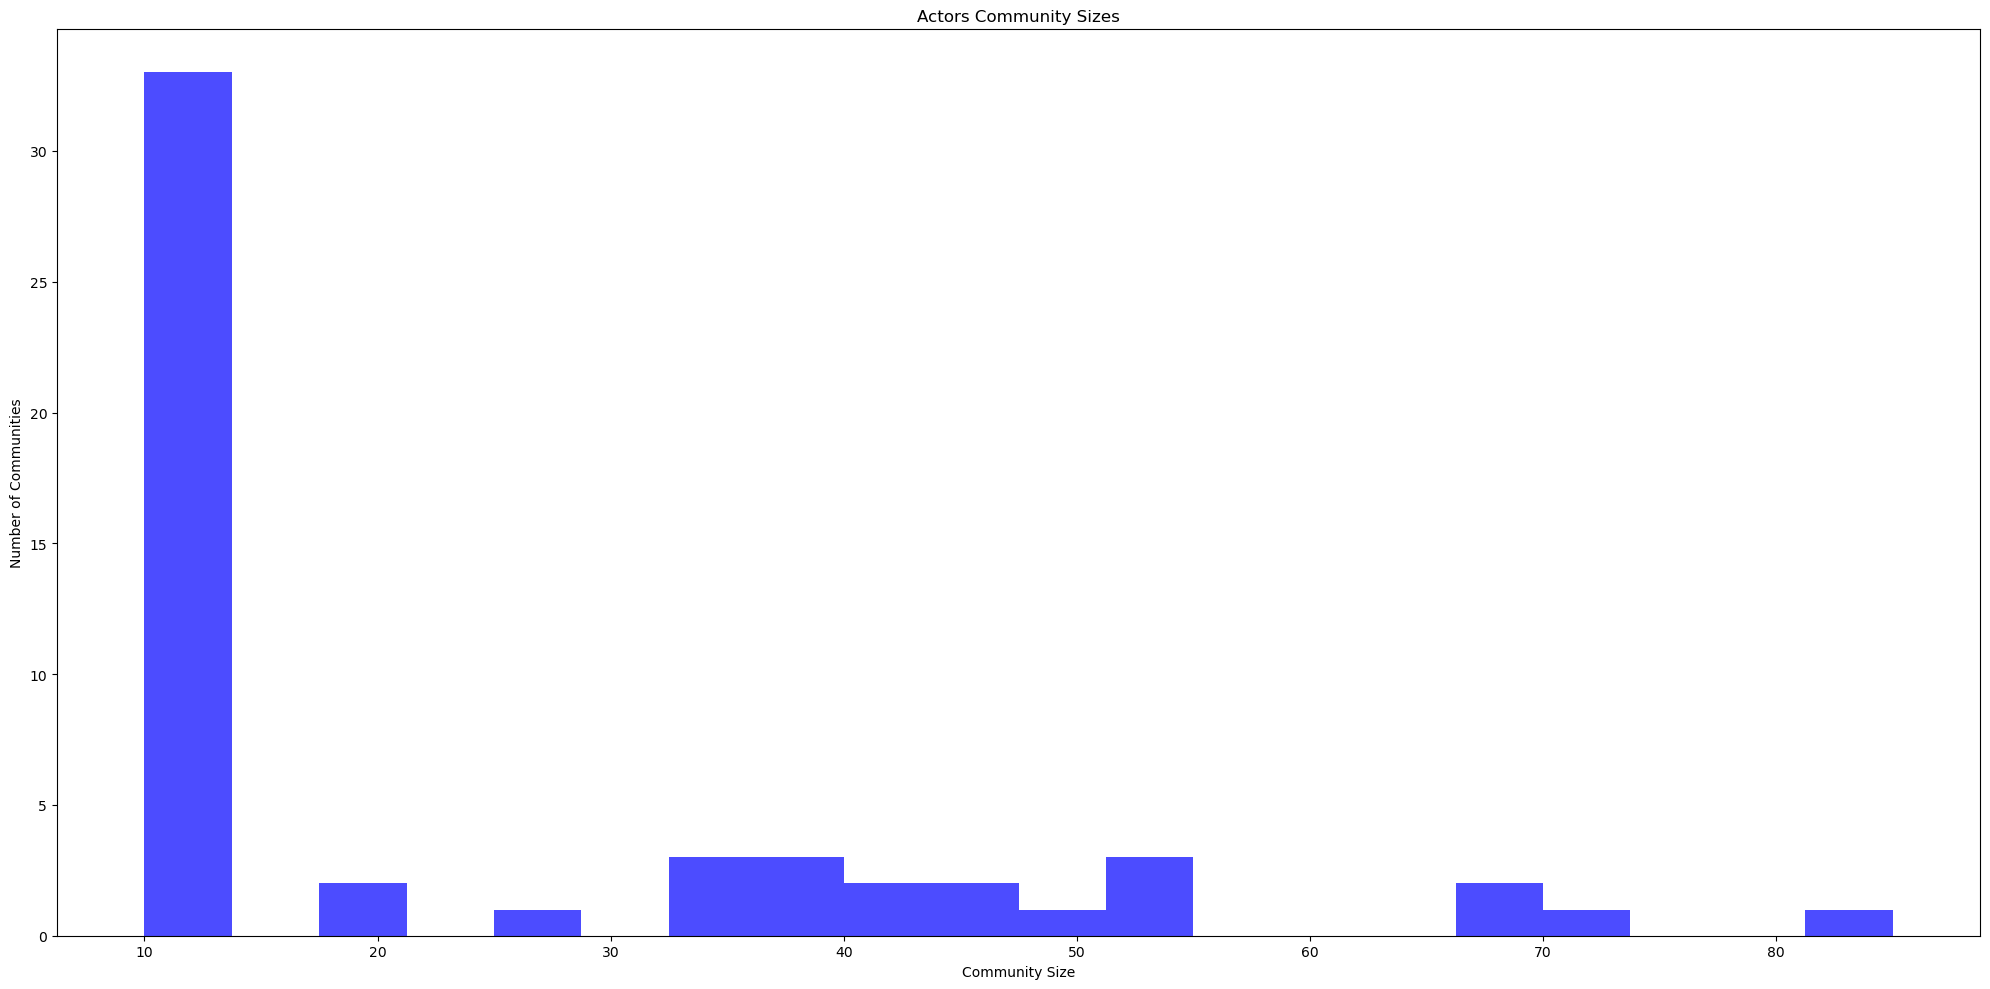

In [31]:
import collections

# compute the distribution of community sizes for the network
community_sizes = list(collections.Counter(communities.values()).values())

# Plot and print the distribution of community sizes
plt.figure(figsize=(20, 10))
plt.hist(community_sizes, bins=20, color='blue', alpha=0.7)
plt.title("Actors Community Sizes")
plt.xlabel("Community Size")
plt.ylabel("Number of Communities")
plt.tight_layout()
plt.show()

## Text and sentiment analysis

### Obtaining the movie plots

In this part of the project, we want to analyse the plots of the top 150 movies, in order to find patterns in the movies that actors star in, related to the communities they form and their popularity. To do this, we will use the Wikipedia python library to obtain the plots of each movie. 

In [33]:
import wikipedia
import pickle

We define a function to extract the plot section of a given movie title, based on what we obtain using the wikipedia library, which differentiates the "Plot" section by using "== Plot ==".

In [34]:
def extract_plot_section(movie_title):
    try:
        # Check if the movie is "Hamilton"
        if movie_title.lower() == "hamilton":
            # For "Hamilton," look for the "== Synopsis ==" section
            plot_marker = "== Synopsis =="
        else:
            # For other movies, look for the "== Plot ==" section
            plot_marker = "== Plot =="
        
        a = wikipedia.search(movie_title + ' film')

        # get the wiki page for the movie
        wiki = wikipedia.page(a[0], auto_suggest = False)

        # find where the "Plot" section starts
        start = wiki.content.find(plot_marker)
        #print(start)
    
        # Check if the "Plot" section was found
        if start != -1:
            # Find where the next " == break line" occurs to mark the end of the Plot
            end = wiki.content.find(" ==\n", start + len(plot_marker))

            # Check if the closing "==" was found
            if end != -1:
                # Return the "Plot" section
                plot_section = wiki.content[start + len(plot_marker):end].strip()
                return plot_section
            else:
                return "Closing '==' not found for the 'Plot' section."
        else:
            return "Plot section not found for this movie."

    except wikipedia.exceptions.DisambiguationError as e:
        return f"Disambiguation error: {e}"
    except wikipedia.exceptions.HTTPTimeoutError:
        return "HTTP timeout error. Please try again later."
    except wikipedia.exceptions.PageError:
        return f"Page not found for {movie_title}."

    except wikipedia.exceptions.DisambiguationError as e:
        return f"Disambiguation error: {e}"
    except wikipedia.exceptions.HTTPTimeoutError:
        return "HTTP timeout error. Please try again later."
    except wikipedia.exceptions.PageError:
        return f"Page not found for {movie_title}."
    except Exception as e:
        return f"An error occurred: {str(e)}"

We use the pickle file where we stored the top 150 movies cast earlier.

In [35]:
with open("movies_cast_new.pkl", "rb") as fp:
    data = pickle.load(fp)

In [38]:
# new dictionary to store movie titles and their plot sections
movie_plots = {}

# Iterate through the movie titles in the original dictionary
for movie_title in data:
    # extract the plot section for each movie
    plot_summary = extract_plot_section(movie_title)
    
    # add the movie title and plot summary to the new dictionary
    movie_plots[movie_title] = plot_summary

In [39]:
print(movie_plots)

{'The Shawshank Redemption': 'In early 1947, Portland, Maine, banker Andy Dufresne arrives at Shawshank State Prison to serve two consecutive life sentences for murdering his wife and her lover. He is befriended by Ellis "Red" Redding, a contraband smuggler serving a life sentence, who procures a rock hammer and a large poster of Rita Hayworth for Andy. Assigned to work in the prison laundry, Andy is frequently sexually assaulted by prison gang "the Sisters" and their leader, Bogs Diamond.\nIn 1949, Andy overhears the captain of the guards, Byron Hadley, complaining about being taxed on an inheritance and offers to help him shelter the money legally. After an assault by the Sisters nearly kills Andy, Hadley beats and cripples Bogs, who is subsequently transferred to another prison; Andy is not attacked again. Warden Samuel Norton meets Andy and reassigns him to the prison library to assist elderly inmate Brooks Hatlen, a front to use Andy\'s financial expertise to manage financial matt

And we store these movie plots in another pickle file, to use it afterwards.

In [ ]:
# save the movie_plots dictionary to a new file (e.g., "movie_plots.pkl")
with open("movie_plots.pkl", "wb") as fp:
    pickle.dump(movie_plots, fp)

### Word-clouds

In [11]:
import pickle

#We open the movie plots pickle file where all plots are posted
with open("movie_plots.pkl", 'rb') as fp:
    plots_dict = pickle.load(fp)

concatenated_texts = ""    

#We iterate over all the plots to get them into a whole string
for key in plots_dict:
    if plots_dict[key] != "Plot section not found for this movie.":
        concatenated_texts += plots_dict[key][:-7]

In [12]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("stopwords")
from nltk import word_tokenize
from nltk.corpus import stopwords

wnl = nltk.WordNetLemmatizer()

def create_tokens(string):
    #We tokenize the string
    tokens = word_tokenize(string)
    #We smoothen our data
    tokens = [wnl.lemmatize(w.lower()) for w in tokens if w.isalpha()]
    stop_words = ['the', 'a', 'to', 'in', 'at', 'and', 'of', 'his', 'on', 'an', 'now', 'into', 'that', 'he', 'she', 'her', 'for', 'which', 'find', 'tell', 'will', 'ha', 'wa', 'return', 'take',
              'one', 'back', 'away', 'two', 'by', 'next', "ha "]
    #We remove our stopwords.
    for word in tokens:
        if word in stop_words:
            tokens.remove(word)
    return tokens

[nltk_data] Downloading package punkt to /Users/emma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/emma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/emma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


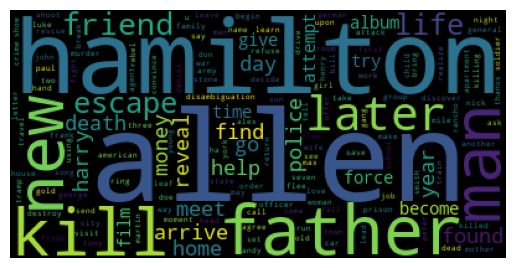

In [13]:
from wordcloud import WordCloud
#We create our WordCloud as done in previous assignments
plots_token = create_tokens(concatenated_texts)
string_plots = " ".join(plots_token)

wordcloud = WordCloud(collocations=False).generate(string_plots)
img=plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Now we want to create the wordcloud of the top 10 movie plots.
We define a popular movie by those in the group of top 10 actors is already starring in it. 

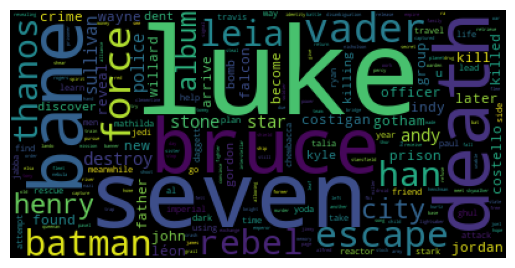

In [14]:
#We get the top 10 actors.
most_popular_actors = sorted(G.degree, key=lambda x: x[1], reverse=True)
top_actors = [i[0] for i in most_popular_actors[:10]]
movie_dict = nx.get_node_attributes(G, 'movies starred in')

#We fetch the top 10 actors' movies
top_movies = []

for actor in top_actors:
    for movie in movie_dict[actor]:
            top_movies.append(movie)


text = ""
#We fetch all these movies into a string
for movie in top_movies:
    if plots_dict[movie] != "Plot section not found for this movie.":
        text += plots_dict[movie][:-7]

string_pop_plots = " ".join(create_tokens(text))

#We create the WordCloud
wordcloud = WordCloud(collocations=False).generate(string_pop_plots)
img=plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Sentiment analysis

In [32]:
import pickle
from tqdm import tqdm
from transformers import pipeline
import re

#Import text classifier
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

#Get first N entries in a dictionary
def get_first_N_item(d, n):
    items = list(d.items())[:n]
    return dict(items)

#Load the movie plot for each movie
with open("movie_plots.pkl", 'rb') as fp:
    data = pickle.load(fp)

#This function takes multiple lists which are outputs of the text classifier and add them togeter
def add_scores(*lists):
    result_dict = {}

    for dicts in zip(*lists):
        for d in dicts:
            label = d["label"]
            result_dict[label] = result_dict.get(label, 0) + d["score"]

    return result_dict

#Function to normalize the scores, the plots have different length
def divide_dict_values(input_dict, divisor):
    result_dict = {}

    for key, value in input_dict.items():
        result_dict[key] = value / divisor

    return result_dict

Neither PyTorch nor TensorFlow >= 2.0 have been found.Models won't be available and only tokenizers, configurationand file/data utilities can be used.


ImportError: cannot import name 'pipeline' from 'transformers' (/usr/local/anaconda3/lib/python3.11/site-packages/transformers/__init__.py)

In [ ]:
new_data = get_first_N_item(data, 150) #Get plot for top 150 movies
movie_names = list(new_data.keys())
empty_dict = {name: None for name in movie_names} #Empty dict to store scores
plots = list(new_data.values())

for i in range(150):
    temp_name = movie_names[i]
    temp_plot = plots[i]
    
    #Removes tabs in plots
    temp_plot = re.sub(r'\n\s*\n', '\n', temp_plot)
    temp_plot = re.sub(r'\n', '', temp_plot)
    
    split_plot = re.split('\.', temp_plot) #Splits the plots into sentences
    
    #Create empty dict to save score for current movie
    result_dict = {}
    

    
   
    for j in range(len(split_plot)):
        #Get the scores and save in the dictionary
        sentiment1 = classifier([split_plot[0]])[0]
        result_dict["list" + str(j)] = sentiment1



    lists = result_dict.values()
    
    
    result = add_scores(*lists) #Add the score for each sentence
    result = divide_dict_values(result, divisor = len(split_plot)) #Normalize
    empty_dict[temp_name] = result #Save ressults for each movie

In [ ]:

file_path = "sentiment_movies.pkl"

# Save the dictionary as a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(empty_dict, file)


In [ ]:
import pickle
import pandas as pd

#Import original pickle file with sentiments
with open(r"C:\Users\petno\Documents\nyback\Documents\SocialGraphs\sentiment_movies.pkl", 'rb') as fp:
    sent_data = pickle.load(fp)
    

#Create empty empty dataframe with sentiments in columns 
movie_names = list(sent_data.keys())
df_movies_sent = pd.DataFrame(columns = list(sent_data['Amadeus']))

#Get the sentiment for each columns and movies same for rows names for the dataframe
for movie_name in movie_names:
    temp_sent = sent_data[movie_name]
    df_movies_sent = df_movies_sent.append(pd.Series(temp_sent, name=movie_name))
    
df_movies_sent.to_csv('new_sentiment_movies.csv', index=True)
#%%



#Load old pickle file
with open(r"C:\Users\petno\Documents\nyback\Documents\SocialGraphs\movies_cast_new.pkl", 'rb') as fp:
    cast_data = pickle.load(fp)

    

actors_list = list(cast_data.values())[:150]
df_actors_sent = pd.DataFrame(columns = list(sent_data['Amadeus'])) #Create dataframe with saved sentiments
all_actors = []
for i in actors_list:
    i = i[:10]
    for j in i:
        all_actors.append(j)


#Get number of movies actors appears in and keep for normalizing sentiment.
actors_counts = Counter(all_actors)
#Get the sentiment for each columns and movies same for rows names for the dataframe
for movie_name in movie_names:
    temp_sent = sent_data[movie_name]
    temp_cast = cast_data[movie_name][:10]
    for c in temp_cast:
        if c in df_actors_sent.index.values:
            df_actors_sent.loc[c] += pd.Series(temp_sent)
        else:
            df_actors_sent = df_actors_sent.append(pd.Series(temp_sent, name=c))

#Divide sentiment by number of appearences
for c in df_actors_sent.index.values:
    df_actors_sent.loc[c] /= actors_counts[c]

#Save dataframe as csv
df_actors_sent.to_csv('new_sentiment_actors.csv', index=True)




In [ ]:
import numpy as np
from collections import Counter
data_all = pd.read_csv(r"C:\Users\petno\Documents\nyback\Documents\SocialGraphs\IMDB Top 250 Movies.csv")
data_sent_movies = pd.read_csv(r"C:\Users\petno\Documents\nyback\Documents\SocialGraphs\new_sentiment_movies.csv")

genres_list = list(data_all['genre'].values)

# Split genres in each string and create a flat list of all genres
all_genres = [genre.strip() for genres in genres_list for genre in genres.split(',')]
genre_counts = Counter(all_genres)
# Get unique genres
unique_genres = list(set(all_genres))
#Create dataframe to store sentiment scores for each genre
df_genre_sent = pd.DataFrame(columns = list(sent_data['Amadeus']), index = unique_genres)
df_genre_sent = df_genre_sent.fillna(0)

movie_names = list(data_sent_movies["Unnamed: 0"].values)

#Ittterate through each movie and get the genre and sentiment
for name in movie_names:
    temp_movie = data_all[data_all['name'] == name]
    temp_sent = data_sent_movies[data_sent_movies["Unnamed: 0"] == name]
    temp_sent = temp_sent.values[:,1:]
    temp_genres = list(temp_movie['genre'].values)
    genres = [genre.strip() for genres in temp_genres for genre in genres.split(',')]
    for g in genres:
        df_genre_sent.loc[g] += temp_sent[0]/genre_counts[g]


#%%
#Get top 10 appearing actors
top_actors = actors_counts.most_common(10)
top_actors_list = [i[0] for i in top_actors]
top_actor_sent= df_actors_sent.loc[top_actors_list]
column_means = top_actor_sent.mean()

#Get their "fear" score
top_actors_fear = column_means['fear']

count = 0
#Go through 1000 iterations where we sample a random population with the same size
for i in range(1000):
    random_rows = df_actors_sent.sample(n=10)
    random_rows_fear = random_rows['fear'].mean()
    if random_rows_fear < top_actors_fear:
        count += 1

print(count/1000)